# Projeto 2 - Predição 

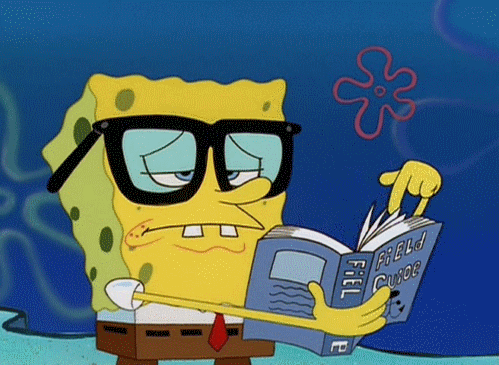

## Parte A - Introdução 


#### carregando as bibliotecas necessárias 

In [92]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

#### verificando o repositório 

In [122]:
import os
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')



Esperamos trabalhar no diretório: 
C:\Users\taina\OneDrive\Área de Trabalho\Projeto 2 Cdados\22-1b-cd-p2-leandra_taina-1



#### carregando a base de Dados

In [127]:
dados = pd.read_csv('dados.csv')
dados=dados.dropna()  #retirando as linhas sem informações 
#dados.isnull().sum()
print("O tamanho da base de dados é de ", len(dados))

O tamanho da base de dados é de  10642


#### Conhecendo o nosso Data Frame 

In [128]:
dados.head()


,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Orçamento sem falhas,Nath Finanças,9.786556e+12,6555601566,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,9.788551e+12,8551006274,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93
2,Recursão,Blake Crouch,9.788551e+12,8551005375,2020,320,português,Intrínseca,4.4,2,618,22,2,6,295,2,E se um dia memórias vívidas de coisas que nun...,Ficção / Ficção científica / Literatura Estran...,21,79
3,"M, o Filho do Século",Antonio Scurati,9.788551e+12,855100607X,2020,816,português,Intrínseca,4.6,60,12,1,0,951,49,55,"O romance M, o Filho do Século conta em trama ...","Biografia, Autobiografia, Memórias / História ...",37,63
4,Oblivion Song: Entre Dois Mundos,Robert Kirkman,9.788551e+12,8551006258,2020,136,português,Intrínseca,4.1,166,16,0,0,376,6,184,Mestre em traçar universos distópicos permeado...,"Ficção / HQ, comics, mangá / Literatura Estran...",44,56


In [129]:
dados.describe()

,ISBN_13,ano,paginas,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,male,female
count,1.064200e+04,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,9.785962e+12,2009.246664,280.068408,3.859500,122.017196,50.500094,37.996053,10.640387,152.303890,53.538433,129.113043,26.246476,73.177786
std,1.461899e+11,58.905509,165.168242,0.708709,205.440090,125.526660,118.393596,60.553771,234.507585,129.305753,208.438098,19.427422,20.116669
min,8.551005e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.788533e+12,2007.000000,176.000000,3.600000,6.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,10.000000,61.000000
50%,9.788551e+12,2012.000000,260.000000,4.000000,26.000000,5.000000,3.000000,0.000000,35.000000,8.000000,31.000000,23.000000,76.000000
75%,9.788579e+12,2016.000000,352.000000,4.200000,130.000000,33.000000,16.000000,2.000000,195.000000,38.000000,146.000000,38.000000,89.000000
max,9.999097e+12,2021.000000,4606.000000,10.000000,999.000000,985.000000,993.000000,877.000000,999.000000,994.000000,999.000000,100.000000,100.000000


In [ ]:
#dados.drop(columns=[''])

## Parte B- Minerando Dados as Características do Dataset 

* ### Variáveis Qualitativas- Tabelas cruzadas

In [147]:

#tentativa de associar a frequencia 
teste=dados['idioma'].value_counts(normalize=True)

teste2=dados['editora'].value_counts(normalize=True)

Rocco         0.287446
Sextante      0.111257
Intrínseca    0.111069
Planeta       0.106559
Galera        0.069160
                ...   
Hay           0.000094
nao           0.000094
Minotauro     0.000094
Rocco,        0.000094
[Rio          0.000094
Name: editora, Length: 87, dtype: float64

In [162]:
pd.crosstab(dados['idioma'], dados['editora'], normalize = True)

editora,.,Academia,Agir,Alfaguara,AllBook,Arqueiro,"Arqueiro,",Bertrand,Best,BestBolso,...,Tusquets,Universo,Valentina,Verso,Verus,Vozes,[Rio,nao,sextante,Ática
idioma,,,,,,,,,,,,,,,,,,,,,
espanhol,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
francês,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
holandês,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
inglês,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000470,0.000000,0.000094,0.000282,0.000000,0.000000,0.000000,0.000000,0.000000
italiano,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
português,0.000094,0.000752,0.000094,0.000094,0.004322,0.051212,0.000094,0.000094,0.000094,0.000094,...,0.000564,0.067469,0.008739,0.000000,0.042849,0.000094,0.000094,0.000094,0.000376,0.000094


Informação extraida: Aproximadamente 99% dos livros estão em português e pertencem as editoras [Rocco, Sextante, Intrínseca, Planeta e Galera]

In [170]:
#utilizando as 5 mais 

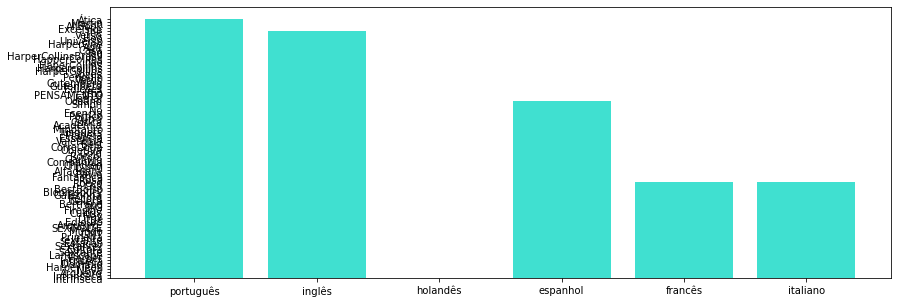

In [171]:
plt.figure(figsize=(14,5))
plt.bar(dados.idioma,dados.editora, color='turquoise')

plt.title('')
plt.show()

In [182]:
pd.crosstab(dados['autor'], dados['avaliacao'], normalize = True, margins=True)

avaliacao,0,1,2,3,4,5,6,7,8,9,...,985,986,987,988,989,994,996,998,999,All
autor,,,,,,,,,,,,,,,,,,,,,
A. C. GOMES MATTOS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000094
Albert Espinosa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282
Ana Maria Braga,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000094
André Aciman,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000188,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000376
Anna Snoekstra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Álvares de Azevedo,0.000000,0.000000,0.000094,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000188
Åsa Larsson,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282
Åsa Schwarz,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000094


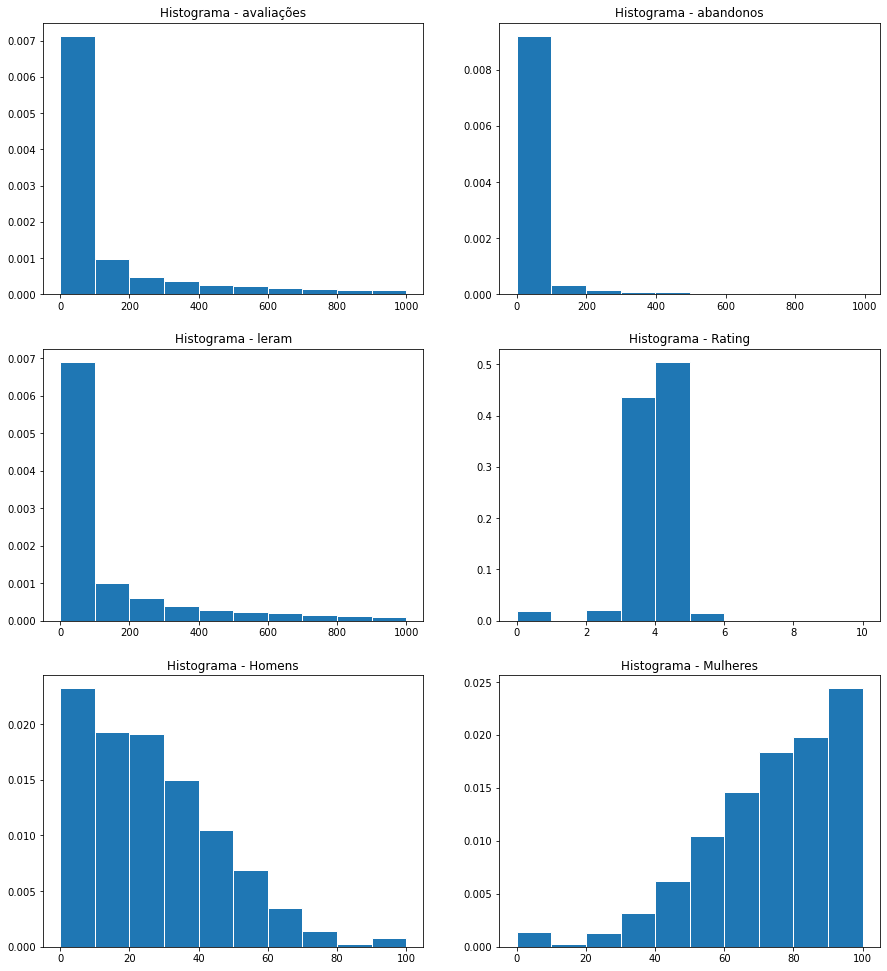

In [207]:
plt.figure(figsize=(15,23))
plt.subplot(421)
plt.hist(dados.avaliacao, density=True, edgecolor="white")
plt.title('Histograma - avaliações', fontweight = 400)

plt.subplot(422)
plt.hist(dados.abandonos, density=True, edgecolor="white")
plt.title('Histograma - abandonos', fontweight = 400)

plt.subplot(423)
plt.hist(dados.leram, density=True, edgecolor="white")
plt.title('Histograma - leram', fontweight = 400)

plt.subplot(424)
plt.hist(dados.rating, density=True, edgecolor="white")
plt.title('Histograma - Rating', fontweight = 400)

plt.subplot(425)
plt.hist(dados.male, density=True, edgecolor="white")
plt.title('Histograma - Homens', fontweight = 400)

plt.subplot(426)
plt.hist(dados.female, density=True, edgecolor="white")
plt.title('Histograma - Mulheres', fontweight = 400)

plt.show()

In [198]:
valodados.autor.value_counts(normalize=True)

Clarice Lispector         0.009303
Rick Riordan              0.006484
J.K. Rowling              0.006202
Meg Cabot                 0.006202
Paulo Coelho              0.006014
                            ...   
Timothée de Fombelle      0.000094
Padre Juarez de Castro    0.000094
Robert B                  0.000094
Filipa Melo               0.000094
Martin Suter              0.000094
Name: autor, Length: 4768, dtype: float64

In [ ]:
a.plot(kind='

* ### Variáveis Quantitativas - Gráficos de dispersão

In [ ]:
idioma = dados['autor'].value_counts()

In [ ]:
idioma.plot(kind='barh')

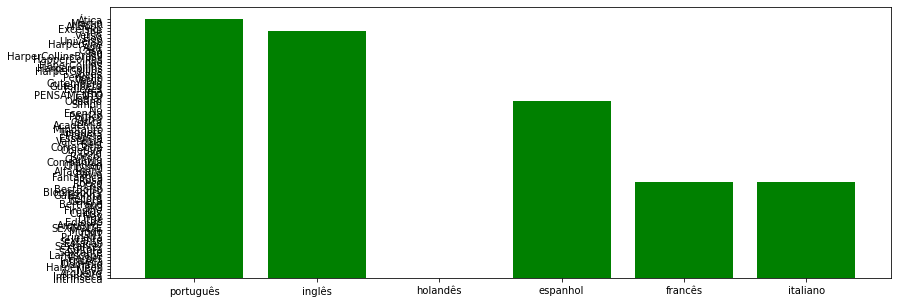

In [193]:
plt.figure(figsize=(14,5))
plt.bar(dados['idioma'],dados['editora'], color='green')
plt.title('')
plt.show()

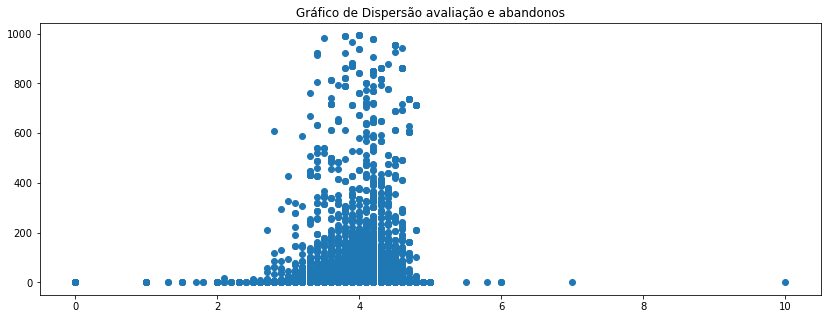

In [46]:
plt.figure(figsize=(14,5))
plt.scatter(dados['rating'],dados['abandonos'])
plt.title('Gráfico de Dispersão avaliação e abandonos')
plt.show()

In [6]:
#pd.crosstab(dados['rating'], dados['relendo'])

In [28]:
#plt.hist(plt.hist(dados.rating, bins=50, density=True, edgecolor='white'))

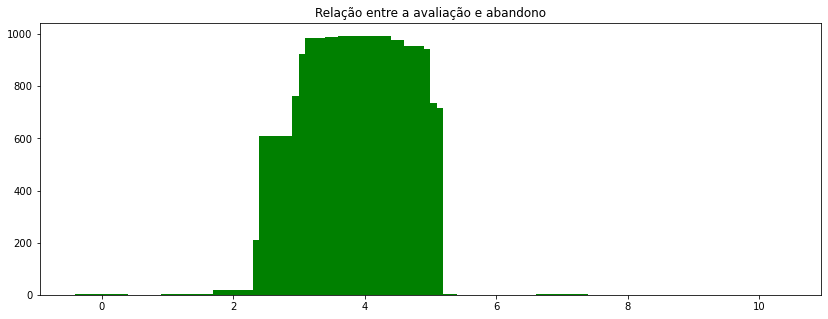

In [115]:

plt.figure(figsize=(14,5))
plt.bar(dados['rating'],dados['abandonos'], color='green')
plt.title('Relação entre a avaliação e abandono')
plt.show()

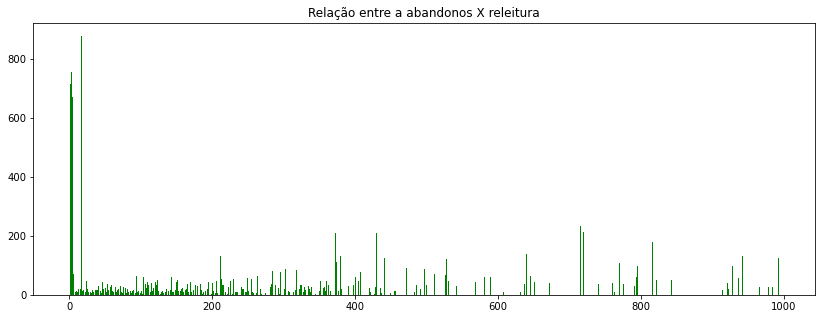

In [38]:

plt.figure(figsize=(14,5))
plt.bar(dados['abandonos'],dados['relendo'], color='green')
plt.title('Relação entre a abandonos X releitura')
plt.show()